# Project2: Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (SM) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`
See Section 2.2 for a description of the dataset.
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

the a list of objects (particles) whose variables are split by commas `","` in the following orger:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

---

In addition to the SM events we are also provided simulated events from `Beyond Standard Model` (BSM) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description
*Responsible:* Robert Currie (<rob.currie@ed.ac.uk>)

### Overview
The task is to design an anomaly detection algorithm which is trained on the SM dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a laten space (bottleneck). 

You will then need to evaluate and discuss the performance of your `AutoEncoder` on the exotic models listed above, and come up with an appropiate metric to identify events from non SM physics.

# **Breakdown**

In the project report you will be assessed in the following way.

1. **Data exploration and preprocessing (20%):** Inspect the datasets; visualise the data (e.g. tables, plots, etc) in an appropriate way; study the composition of the dataset; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promissing approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (30%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. 
4. **Discussion, style throughout (20%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


## Data Preprocessing
* The data is provided in a CSV (text) format with semicolon and comma seperated list with **one line per event**. We need to convert this into an appropiate format for our neural networks. 
* Since the number of particles per event is variable you will need to **truncate** and **mask** particles in the event. The following steps need to be perfomed on the SM (background) sample:
     1. Create variables where you count the number of electrons, photons, muons, jets and bjets in the event (ignore charge) before any truncation.
     2. Choose an appropiate number of particles to study per event (recommended: **8** particles are used in the paper)
     3. Check the particles are sorted by energy (largest to smallest)
     4. If the event has more than 8 particles choose the **8 particles** with **highest energy and truncate** the rest.
     5. convert energy and momentum variables by logarithm (e.g., `log`) - this is to prioritise differences in energy **scale** over more minor differences. 
     6. If the event has less than 8 particles, create kinematic variables with 0 values for the missing particles.
* The final set of training variables should look something like this (the exact format is up to you)
    |N ele| N muon| N jets| N bjets| N photons| log(MET)| METphi| log(E1)| log(pt1)| eta1| phi1| ... | phi8|
    |-|-|-|-|-|-|-|-|-|-|-|-|-|
    
    7. After the dataset is ready, use `MinMaxScalar` or similar to standardise the training variables over the SM dataset
* After the SM dataset has been processed use the same processing on the BSM (signal samples). Use the same standardisation functions as on the SM dataset, *Do not recalculate the standardisation*.
* Keep associated metatata (`event ID; process ID; event weight;`) though this does not need processing. 
* Randomise and split the SM (background) dataset into training and testing datasets (the BSM samples don't need to be split (*Why?*))
* *Hint*: It is suggested that you write a class or function for the preprocessing which takes a csv path as input and provides the processed dataset. After you have done the data processing its suggested you save the datasets so as to not have to recalculate them again if the kernel is restarted. 

## Training
* Design an appropiate algorithm which reconstrucuts the input variables after going though a laten space. Choose an appropiate cost function.
    * The suggested method for ease of implementation is the `AutoEncoder`
    * However, if you consider learning about or trying something else, as described in the paper, you should feel welcome to try `VAEs`, `ConvAEs`, `ConvVAEs`, etc. Don't feel you **have** to create an `AE`.

* Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
* It is suggested to create a class or function around your algorithm which allows you to easily tweek hyperparameters of the model (depth, number of nodes, number of laten variables, activation functions, regularisation, etc)
* Train the model over several parameters to find the best algorithm. Document the process throught and discuss your choices. Keep track of validation performance. Save the models the best points. 
* Explore the results and document your findings. Ask as many questions about your model as you can, and document your findings. Does the model generalise well to data it hasn't seen?

## Evaluation
In the evaluation explore different datasets an try answer as many questions about the performance as possible. 
* Evaluate the performance of the `AE` on BSM dataset. Which models are more or less similar to the SM?
* Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event? 
* Explore SM events. Which look more anomolous than others? Are there any particular features which are responsible, e.g. particle counts, MET ranges, etc.? 
* Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

---
## Submission


To complete this project, you should **Submit your Jupyter notebook** as a "report." See the comments below on documentation,

**You should submit by Friday 9th Feb 2024 at 10AM**


For all task we're not looking for exceptional model performace and high scores (although those are nice too), **we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence takes a very long time so **don't spend hours on training hundreds of epochs.** Be conservative on epoch numbers (30 is normally more than enough) and use appropiate techniques like EarlyStopping to speed things up. Once you land on a good model you can allow for longer training times if performance can still improve.


## Documentation: Annotation and Commentary

It is important that __all__ code is annotated and that you provide brief commentary __at each step__ to explain your approach. We expect well-documented jupyter notebooks, not an unordered collection of code snippets. You can also include any failed approaches if you provide reasonable explanation. 

Unlike weekly checkpoints where you were being guided towards the *''correct''* answer, this project is by design more open ended. It is, therefore, necessary to give some justification for choosing one method over another.
Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material. Only provide a brief explanation for each step. Aim to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of your steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in markdown format. __Do not__ add commentary or significant text as a code comment in the same cell as the code.
(Code comments are still helpful!)

__20\% of the mark for each exercise is allocated to coding style and clarity of comments and approach.__

## Submission Steps

It is important your code is fully functional before it is submitted or this will affect your final mark. 

When you are ready to submit your report perform the following steps: 

 -  In Jupyter run `Kernel` -> `Restart Kernel ` and ` Clear All Outputs `
 -  Then `Kernel` -> `Restart & Run All ` to ensure that all your analysis  is reproducible and all output can be regenerated
 -  Save the notebook, and close Jupyter
 -  **Change the filename to contain Name_Surname**
 -  Tar and zip your project folder if you have multiple files in a working directory. You are free to include any supporting code. Make sure this belongs in the project folder and is referenced correctly in your notebook. Do __not__ include any of the input data.
 -  Submit this file or zipped folder through Learn. In case of problems or if your compressed project folder exceeds 20 MB (first make sure you are not including any CSV files, then) email your submission to Kieran (the course administrator) at the Teaching Office and me.

# Happy Anomaly Hunting
---
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.</p>&mdash; Josh Wills (@josh_wills) <a href="https://twitter.com/josh_wills/status/198093512149958656?ref_src=twsrc%5Etfw">May 3, 2012</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

Your code follows....

# Notes

This notebook is currently being developed in a docker container as it is the only way to get tensorflow working with my GPU and as such does not have the DAML enviroment installed. As a result this notebook will run teminal commands to install the required dependencies (currently all depedencies are met by the DAML enviroment). If you asre uncomfortable with this or the command creates conflics with an existing enviroment, you can force the notebook to skip the terminal commands by setting the ```run_cli``` option to ```False``` in the config.yaml file

# Download Dependencies

In [1]:
import os, sys, yaml, warnings, logging, time

# Store sting with cwd
CWD = os.getcwd() + "/"

# Import config settings as dictionary 
with open(CWD + "config.yaml", "r") as file:
    CFG = yaml.safe_load(file)

# Install dependencies
if not CFG["jupyter"]["run_cli"] or not os.path.isfile(CWD + "requirements.txt"):
    warnings.warn("Skipping dependency instalation. This may cause dependency issues further down in the notebook")
else:
    os.system(f"pip install --upgrade --ignore-installed -r {CWD + 'requirements.txt'}")

/tmp/ipykernel_290445/413891760.py:12: UserWarning: Skipping dependency instalation. This may cause dependency issues further down in the notebook
  warnings.warn("Skipping dependency instalation. This may cause dependency issues further down in the notebook")


In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as snc
# from tqdm import tqdm 
import matplotlib.pyplot as plt

# Import custom classed and functions
from src.core import Dataclass, DataLoader, TorchTrainer
import sklearn

# Turn off divide by zero numpy error (we alreadsy take NaN's into account)
np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

def compute_anomaly_scores(data, network, anomaly_score_function, config):
    """
    Use a trained network to compute the anomaly score of a given dataset
    """ 

    # Define device to send
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Instansiate dataloader
    if not isinstance(data, Dataset):
        raise Exception("Dataset passed to function is not a torch Dataset class")
    loader = DataLoader(data, batch_size=128, shuffle=False)

    # Set network to eval mode and send to device
    network = network.eval().to(device)

    # Define empty list to contain anomaly scores
    anomaly_socres = []

    # Iterate through dataset and compute anomaly score
    with torch.no_grad():
        for input in iter(loader):
            # Send input to device
            input = input.to(device)

            if config["trainer"]["model_name"] == "denseVAE":
                # Compute model output and compute anomaly score
                output, mean, logvar = network(input)
                anomaly_socre = anomaly_score_function(input, output, mean, logvar).cpu().numpy()
            else:
                # Compute model output and compute anomaly score
                output = network(input)
                anomaly_socre = anomaly_score_function(input, output).cpu().tolist()
                # print(anomaly_socre)
            # Append anomaly score to list
            anomaly_socres.extend(anomaly_socre)
    
    # Return normalised anomaly scores
    anomaly_socres = np.array(anomaly_socres)
    return anomaly_socres

def scale_dataset(dataset, scaled_min=-1, scaled_max=1,):
    """
    Function which will scale input numpy array of tf tensor within the defined range
    """
    # Check scale range is valid
    if not scaled_min < scaled_max:
        raise Exception(f"Scale range is not valid. Minimum value is larger than maximum value in range.")

    # Find the current minimim and maximum value of dataset
    if isinstance(dataset, np.ndarray):
        current_min, current_max = dataset.min(), dataset.max()
    else:
        current_min, current_max = dataset.min(), dataset.max()
    # Scale the data
    scaled_dataset = (scaled_max - scaled_min) * (dataset - current_min)/(current_max - current_min) + scaled_min
    
    # # Print check
    # print(f"Expected dataset scaling is [{int(scaled_min)}, {(scaled_max)}]")
    # print(f"Actual dataset scaling is [{int(scaled_dataset.min())}, {(scaled_dataset.max())}]\n")
    
    # Return a tensorflow tensor or numpy array
    return scaled_dataset

# **Creating Dataloader**

Currenly the datasets are stored in csv files with a non-uniform number of columns for each event. As such, we will have to approch the task of importing the data in a non-trivial way. We will create a dataloader class which will be taked with taking a csv path and return a well formatted numpy array which can be used lated down the line for training. 

This class is called ```DataLoader``` and can be found in the ```src.core``` directory under the name ```DataLoader.py```. The class will take the following steps to load in a csv.

### **If we ask ```DataLoader``` to read raw csv:**

- We will first parse the raw csv dividing the strings in each line according to the outer ```;``` delimiter. We will call the 1st 5 columns event metadata and stroree them in a pandas dataframe. the remaining string contaings the kinematics for each particle in the event. We will call this string the ```kinematicString``` and store it in a seperate column in the dataframe.

We now have a dataset with the following structure:
| event_id | process_id | event_weight | met | met_phi | kinematic_string | 
| :------- | :--------: | :----------: | :-: | :-----: | ---------------: |

- We will now parse the kinematicString which is delimited with ```;``` per particle and with ```,``` per particle's kinematic parameter. Once parsed, we will arrange the particles per event in order of decending energy and keep the ```num_max_particles``` most energetic particles in an event. If the event has less than ```num_max_particles```, we will pad the remaining particle kinematic parameters with **0.0**. We will also remove event metadata which we do not want from the dataframe

We now have a dataset with the following structure:
| met | met_phi | object1 | energy1 | trans_momentum1 | pseudo_rapidity1 | phi1 | ... | phi_n |
| :-- | :-----: | :-----: | :-----: | :-------------: | :--------------: | :--: | :-: | ----: |

- We now take the logarithm of all the columns containing energy of momentum data dor each event.

We now have a dataset with the following structure:
| log(met) | met_phi | object1 | log(energy1) | log(trans_momentum1) | pseudo_rapidity1 | phi1 | ... | phi_n |
| :------- | :-----: | :-----: | :----------: | :------------------: | :--------------: | :--: | :-: | ----: |

- Lastly we will compute the number of particles what appear in each event and remove the object columns from the dataframe. We then save the dataframe as a csv if needed. The datareame or a numpy array of the dataframe's values can then be obtrained from the class 

We now have a dataset with the following structure:
| n_ele | n_muon | n_jets | n_bjets | n_photons | log(met) | met_phi | log(energy1) | log(trans_momentum1) | pseudo_rapidity1 | phi1 | ... | phi_n |
| ----: | :----: | :----: | :-----: | :-------: | :------: | :-----: | :----------: | :------------------: | :--------------: | :--: | :-: | ----: |

### **If we ask ```DataLoader``` to read processed csv:**

- The dataloader will read a processed csv which pas produced and saved previously as a pandas dataframe. The dataframe or a numpy array of the values can then be returned by the class.

# **Data Transformations**

Now that we have written a class capable of reqading a csv file and returning a processed and uniform numpy array,. we define function to transform data from a raw numpy array to TF datasets which we can use for batch training.

The script containing all the data transformation functions can be found in the ```scr.utils``` directory in the ```utility_functions.py``` script.

The following steps must be taken:
- Scale dataset from range (-1, 1). This is done s.t the neural network can more easily compute weights
- Shuffle and split the numpy array into a test and train dataset using ```sklearn.model_selection.train_test_split```
- Convert to tf.Dataset class s.t we can sample the datasets in batches using ```tf.data.Dataset.from_tensor_slices```

In [4]:
# Apply reansfromations and return the tf dataset iterables 
sm_dataclass = Dataclass(CFG["dataloader"]["raw_datasets"]["background"], CWD, 8, loadProcessed=True, saveProcessed=True)
bsm_dataset = Dataclass(CFG["dataloader"]["raw_datasets"]["gluino_rpv"][0], CWD, 8, True, True)

torch.Size([340267, 39])
torch.Size([58540, 39])


# **VAE Model**

We now create the VAE model which will be used to trained and discriminate anomalies. We will first attempt to use two VAE models and compare their performance. One will be a regular Fully-Connected Dense VAE which will take a 1D vector as an input. The Second VAE will be a Convolutional VAE which will take a 2D image-like input.

Both networks can be found in the ```src.models``` directory.

For the fully-connected VAE, it's architecture is:

- Encoder: 
    - Dense Layer (outDims = 32) + LeakyReLU
    - Dense Layer (outDims = 16) + LeakyReLU
    - Dense Layer (outDims = 10)

- Decoder:
    - Dense Layer (outDims = 16) + LeakyReLU
    - Dense Layer (outDims = 32) + LeakyReLU
    - Dense Layer (outDims = inputDims) + Sigmoid

# **Constructing trainer class**

Now that we have network classes and a dataset, we can build a class which can be used to train and validate our models. The class will take as an input the configuration dictionary s.t we can modify training hyperparameters from the config yaml file.

The trainier class can be fount in the ```src.core``` directory in the ```trainer.py``` file.

In order to run the training process, we call the ```runBatchProcess()``` method of the trainer.

In [5]:
def anom_func(input, output, mean=None, logvar=None):
    mseLoss = nn.functional.mse_loss(input, output, reduction="none").mean(axis=1)
    l1Loss = nn.functional.l1_loss(input, output, reduction="none")
    # klLoss  = - 0.5 * torch.sum(1+ logvar - mean.pow(2) - logvar.exp())

    # return l1Loss
    return mseLoss 
    # return klLoss + mseLoss

def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm


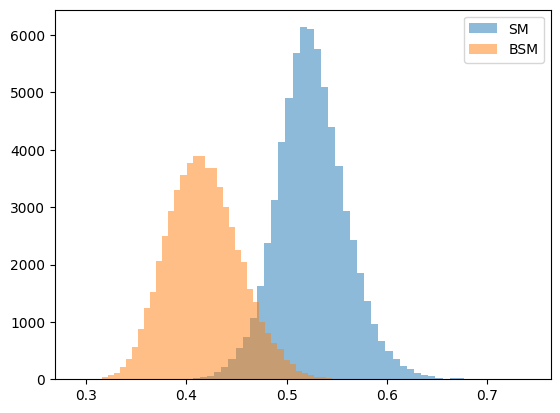

In [6]:
trainer = TorchTrainer(CFG, sm_dataclass)
sm_val_dataset = trainer.valData
sm_train_dataset = trainer.trainData
untrained_network = trainer.network
sm_pretrain_anomaly_scores = compute_anomaly_scores(sm_val_dataset, untrained_network, anom_func, CFG)
bsm_pretrain_anomaly_scores = compute_anomaly_scores(bsm_dataset, untrained_network, anom_func, CFG)
_=plt.hist(sm_pretrain_anomaly_scores, alpha=0.5, bins=50, log=False, label="SM")
_=plt.hist(bsm_pretrain_anomaly_scores,  alpha=0.5, bins=50, log=False, label="BSM")
plt.legend()

In [7]:
trainer.runBatchProcess()
trained_network = trainer.network

##### EPOCH 1 #####
EPOCH: 1 ##### MODE: Train ##### LOSS: 0.00012079045554681567
EPOCH: 1 ##### MODE: Validation ##### LOSS: 3.197098699983835e-05
##### EPOCH 2 #####
EPOCH: 2 ##### MODE: Train ##### LOSS: 2.617745853849281e-05
EPOCH: 2 ##### MODE: Validation ##### LOSS: 2.151916638954305e-05
##### EPOCH 3 #####
EPOCH: 3 ##### MODE: Train ##### LOSS: 1.8310048963964874e-05
EPOCH: 3 ##### MODE: Validation ##### LOSS: 1.5039176447785724e-05
##### EPOCH 4 #####
EPOCH: 4 ##### MODE: Train ##### LOSS: 1.3252041743988084e-05
EPOCH: 4 ##### MODE: Validation ##### LOSS: 1.2386340301753688e-05
##### EPOCH 5 #####
EPOCH: 5 ##### MODE: Train ##### LOSS: 1.1830158414644057e-05
EPOCH: 5 ##### MODE: Validation ##### LOSS: 1.1250384450629927e-05
##### EPOCH 6 #####
EPOCH: 6 ##### MODE: Train ##### LOSS: 1.0454667494695837e-05
EPOCH: 6 ##### MODE: Validation ##### LOSS: 9.816434843401886e-06
##### EPOCH 7 #####
EPOCH: 7 ##### MODE: Train ##### LOSS: 9.318591355169242e-06
EPOCH: 7 ##### MODE: Validati

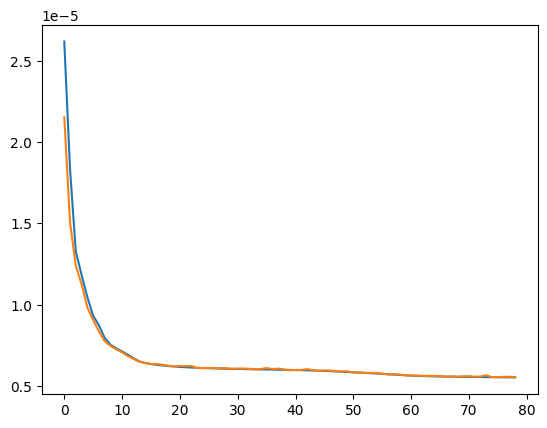

In [8]:
trainLoss = trainer.metrics["train"]["loss"][1:]
valLoss = trainer.metrics["val"]["loss"][1:]

plt.plot(trainLoss)
plt.plot(valLoss)

In [9]:
def find_hist_interception(sm, bsm):
    sm_maximum = sm.max()
    bsm_minimum = bsm.min()
    count = (sm>bsm_minimum).sum()
    print(count, sm.size)
    return (count/sm.size)


In [10]:
bsm_dataset = Dataclass(CFG["dataloader"]["raw_datasets"]["gluino_rpv"][0], CWD, 8, True, True)
sm_posttrain_anomaly_scores = compute_anomaly_scores(sm_val_dataset, trained_network, anom_func, CFG)
bsm_posttrain_anomaly_scores = compute_anomaly_scores(bsm_dataset, trained_network, anom_func, CFG)
print(f"{find_hist_interception(sm_posttrain_anomaly_scores, bsm_posttrain_anomaly_scores):.2%}")

torch.Size([58540, 39])
635 68053
0.93%


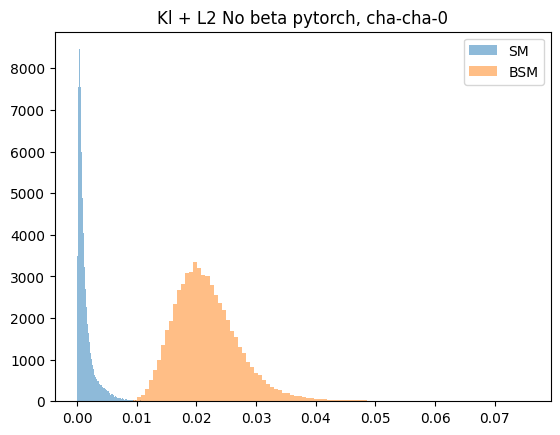

In [11]:
_=plt.hist(sm_posttrain_anomaly_scores, alpha=0.5, bins=100, log=False, label="SM")
_=plt.hist(bsm_posttrain_anomaly_scores,  alpha=0.5, bins=100, log=False, label="BSM")
plt.title("Kl + L2 No beta pytorch, cha-cha-0")
plt.legend()
# plt.xlim(0, 1)

In [12]:

bsm_dataset = Dataclass(CFG["dataloader"]["raw_datasets"]["z_lepton"][0], CWD, 8, True, True)
bsm_posttrain_anomaly_scores = compute_anomaly_scores(bsm_dataset, trained_network, anom_func, CFG)
print(f"{find_hist_interception(sm_posttrain_anomaly_scores, bsm_posttrain_anomaly_scores):.2%}")

torch.Size([3401, 39])
91 68053
0.13%


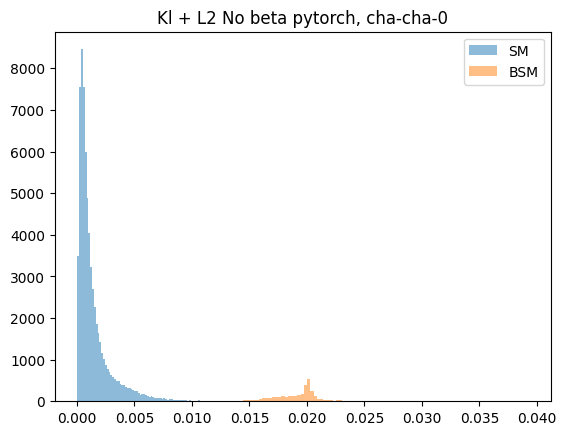

In [13]:
_=plt.hist(sm_posttrain_anomaly_scores, alpha=0.5, bins=100, log=False, label="SM")
_=plt.hist(bsm_posttrain_anomaly_scores,  alpha=0.5, bins=100, log=False, label="BSM")
plt.title("Kl + L2 No beta pytorch, cha-cha-0")
plt.legend()
# plt.xlim(0, 1)

In [14]:

bsm_dataset = Dataclass(CFG["dataloader"]["raw_datasets"]["chargino_chargino"][0], CWD, 8, True, True)
bsm_posttrain_anomaly_scores = compute_anomaly_scores(bsm_dataset, trained_network, anom_func, CFG)
print(f"{find_hist_interception(sm_posttrain_anomaly_scores, bsm_posttrain_anomaly_scores):.2%}")

torch.Size([664, 39])
36 68053
0.05%


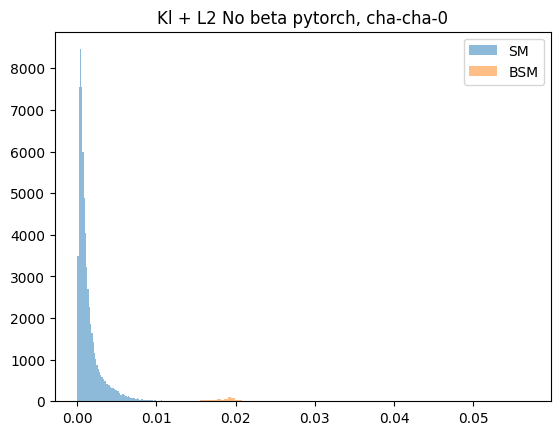

In [15]:
_=plt.hist(sm_posttrain_anomaly_scores, alpha=0.5, bins=100, log=False, label="SM")
_=plt.hist(bsm_posttrain_anomaly_scores,  alpha=0.5, bins=100, log=False, label="BSM")
plt.title("Kl + L2 No beta pytorch, cha-cha-0")
plt.legend()
# plt.xlim(0, 1)

In [16]:
# from sklearn import metrics
# fig, ax = plt.subplots(1, 1)

# truth_pre = np.concatenate([ np.zeros_like( sm_pretrain_anomaly_scores) , np.ones_like(bsm_pretrain_anomaly_scores) ])
# score_pre = np.concatenate([sm_pretrain_anomaly_scores,  bsm_pretrain_anomaly_scores])

# truth_post = np.concatenate([ np.zeros_like( sm_posttrain_anomaly_scores) , np.ones_like(bsm_posttrain_anomaly_scores) ])
# score_post = np.concatenate([sm_posttrain_anomaly_scores,  bsm_posttrain_anomaly_scores])

# metrics.RocCurveDisplay.from_predictions(truth_post, score_post, ax=ax, name="Post Training")
# metrics.RocCurveDisplay.from_predictions(truth_pre, score_pre, ax=ax, name="Pre Training")
